## Fetch and Load data

In [1]:
#fetch MNIST dataset using sci-kit learn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)
mnist.keys()

C:\Users\Mary\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#alternatively load data from keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [79]:
import pandas as pd
import numpy as np
x , y= mnist['data'], mnist['target']

In [3]:
print(x.shape, y.shape)

(70000, 784) (70000,)


In [4]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black)

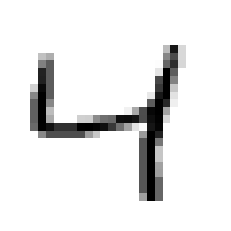

In [7]:
#To view a digit from the dataset, we will be using matplotlib's imshow() function

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x.iloc[2].to_numpy()
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [8]:
y[2]

'4'

In [9]:
#because the label is a string, let's cast y to integers
y = y.astype(int)
y.dtype

dtype('int32')

## Set aside a train and test data
- MNIST is already split into a training and test set

In [10]:
x_train, x_test, y_train, y_test = x[:60000], x[:10000], y[:60000], y[:10000]

## Using Convolutional Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Reshape, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import *

- initiate sequential class since there are various layers to build CNN which must all be in sequence 
- add the first convolutional layer
- apply pooling operation to reduce the dimensions of the feature maps. reduces the number of parametes to learn and reduces computation in the neural network
- apply the dropout technique to prevent overfitting
- Flatten to convert the dataset into a 1D array for input into the next layer.
- use a dense class to create a fully connected layer and output layer
- softmax is used for the output layer to bring the output of the neural network to a probability distribution over predicting classes

In [72]:
#intializing CNN and adding a convolutional layer

model = Sequential()
model.add(Reshape((28,28,1), input_shape = x.shape[1:]))
model.add(Conv2D(filters = 8, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(rate = 0.25))

#add two convolutional layer
model.add(Conv2D(filters = 16, kernel_size =3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32 , kernel_size = 3, activation ='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(10, activation = 'softmax'))

In [73]:
#compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [74]:
#model summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_9 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_33 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 8)        0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 13, 13, 8)         0         
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                

In [75]:
#fit the model on the training set
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 163s 51ms/step - loss: 2.3398 - accuracy: 0.2121
Epoch 2/50
1875/1875 [==============================] - 71s 38ms/step - loss: 1.5535 - accuracy: 0.4253
Epoch 3/50
1875/1875 [==============================] - 117s 62ms/step - loss: 0.8893 - accuracy: 0.7114
Epoch 4/50
1875/1875 [==============================] - 106s 56ms/step - loss: 0.6885 - accuracy: 0.7889
Epoch 5/50
1875/1875 [==============================] - 93s 50ms/step - loss: 0.5825 - accuracy: 0.8261
Epoch 6/50
1875/1875 [==============================] - 132s 71ms/step - loss: 0.5057 - accuracy: 0.8540
Epoch 7/50
1875/1875 [==============================] - 99s 53ms/step - loss: 0.4523 - accuracy: 0.8710
Epoch 8/50
1875/1875 [==============================] - 114s 61ms/step - loss: 0.4198 - accuracy: 0.8808
Epoch 9/50
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3885 - accuracy: 0.8893
Epoch 10/50
1875/1875 [==============================] - 10

In [80]:
np.set_printoptions(formatter = {'float': '{:0.2f}'.format})

In [90]:
#predictions
pred = model.predict(x_test)
y_pred = [np.argmax(pred[i]) for i in range(len(pred))]
y_pred[:10]

313/313 [==============================] - 7s 23ms/step


[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

In [91]:
print(y_test[:10])

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: int32


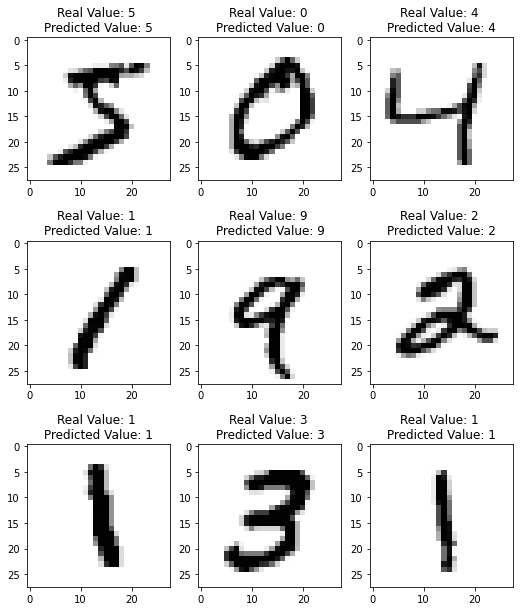

In [129]:
#Visualising predictions
y_list = list(y_test)

plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3,3, i+1)
    some_val = x_test.iloc[i].to_numpy()
    some_val_image = some_val.reshape(28,28)
    plt.imshow(some_val_image, cmap = mpl.cm.binary)
    plt.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
    plt.title(f'Real Value: {y_list[i]} \n'+ f'Predicted Value: {y_pred[i]}')